Predicting Diabetes in Human Beings

Eniola Olawoagbo

Oluwagbemi Lesi

Goals

Our goal is to predict Diabetes in Human beings using females of at least 21 years old of Pima Indian heritage.

According to World Health Organization (WHO), about 422 million people are living with diabetes around the world. By 2035, this number will be increased to 592 million.

How Do Human Beings Become Diabetic

Food powers our human bodies, so, when we eat food our bodies turns it into glucose.This conversion takes place in our liver and gut.

Then, our bodies produces insulin through the pancreas which in turn converts glucose in our cell walls into energy for our cells.

Diabetes occurs when the body (Pancreas) does not produce any or enough insulin to break down glucose into energy for our body cells.

Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

Several constraints were placed on the selection of these instances from a larger database.

In particular, all patients here are females of at least 21 years old of Pima Indian heritage.

The Pima are a group of Native Americans living in an area consisting of what is now central and southern Arizona, as well as northwestern Mexico in the states of Sonora and Chihuahua.

Content

The datasets consists of several medical predictor variables (X) and one target variable, Outcome (Y). 

PREDICTOR VARIABLE (X)

Pregnancies - (Number of times pregnant)


Glucose in the Blood- (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)


Blood Pressure - Diastolic blood pressure (mm Hg)


Skin Thickness - Triceps skin fold thickness (mm)


Insulin Level - 2-Hour serum insulin (mu U/ml)


BMI (Body Mass Index) (weight in kg/(height in m)^2)


Diabetes Pedigree Function - (Information about diabetes history in relatives and genetic relationship of those relatives with patients). Higher Pedigree Function means patient is more likely to have diabetes.


Age (Years)

Data Exploration and Pre-processing Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
db = pd.read_csv('diabetes.csv')

In [3]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
db.shape

(768, 9)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
db.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
db.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print (db.shape)
db.drop_duplicates(inplace = True)
print (db.shape)

(768, 9)
(768, 9)


In [12]:
X = db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y=db['Outcome']

In [13]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
X.shape

(768, 8)

In [15]:
#Visualisation

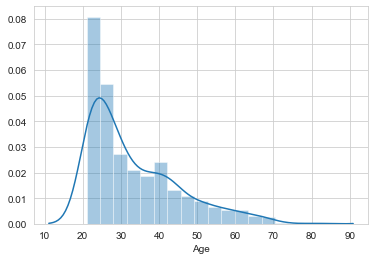

In [16]:
sns.distplot(X['Age'])

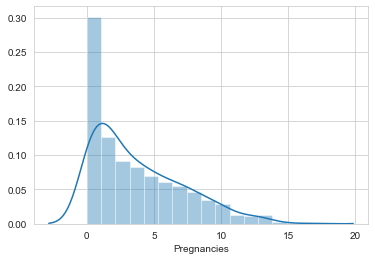

In [17]:
sns.distplot(X['Pregnancies'])
## The distribution of Pregnancy

<Figure size 1152x864 with 0 Axes>

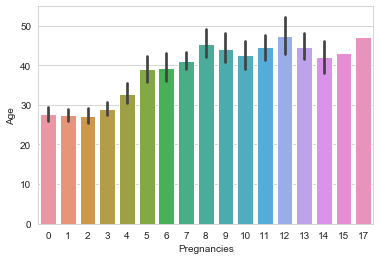

<Figure size 1152x864 with 0 Axes>

In [18]:
sns.barplot(x='Pregnancies',y='Age',data=X)
plt.figure(figsize=(16,12))

In [19]:
X['Age'].min()

21

In [20]:
X['Pregnancies'].max()

17

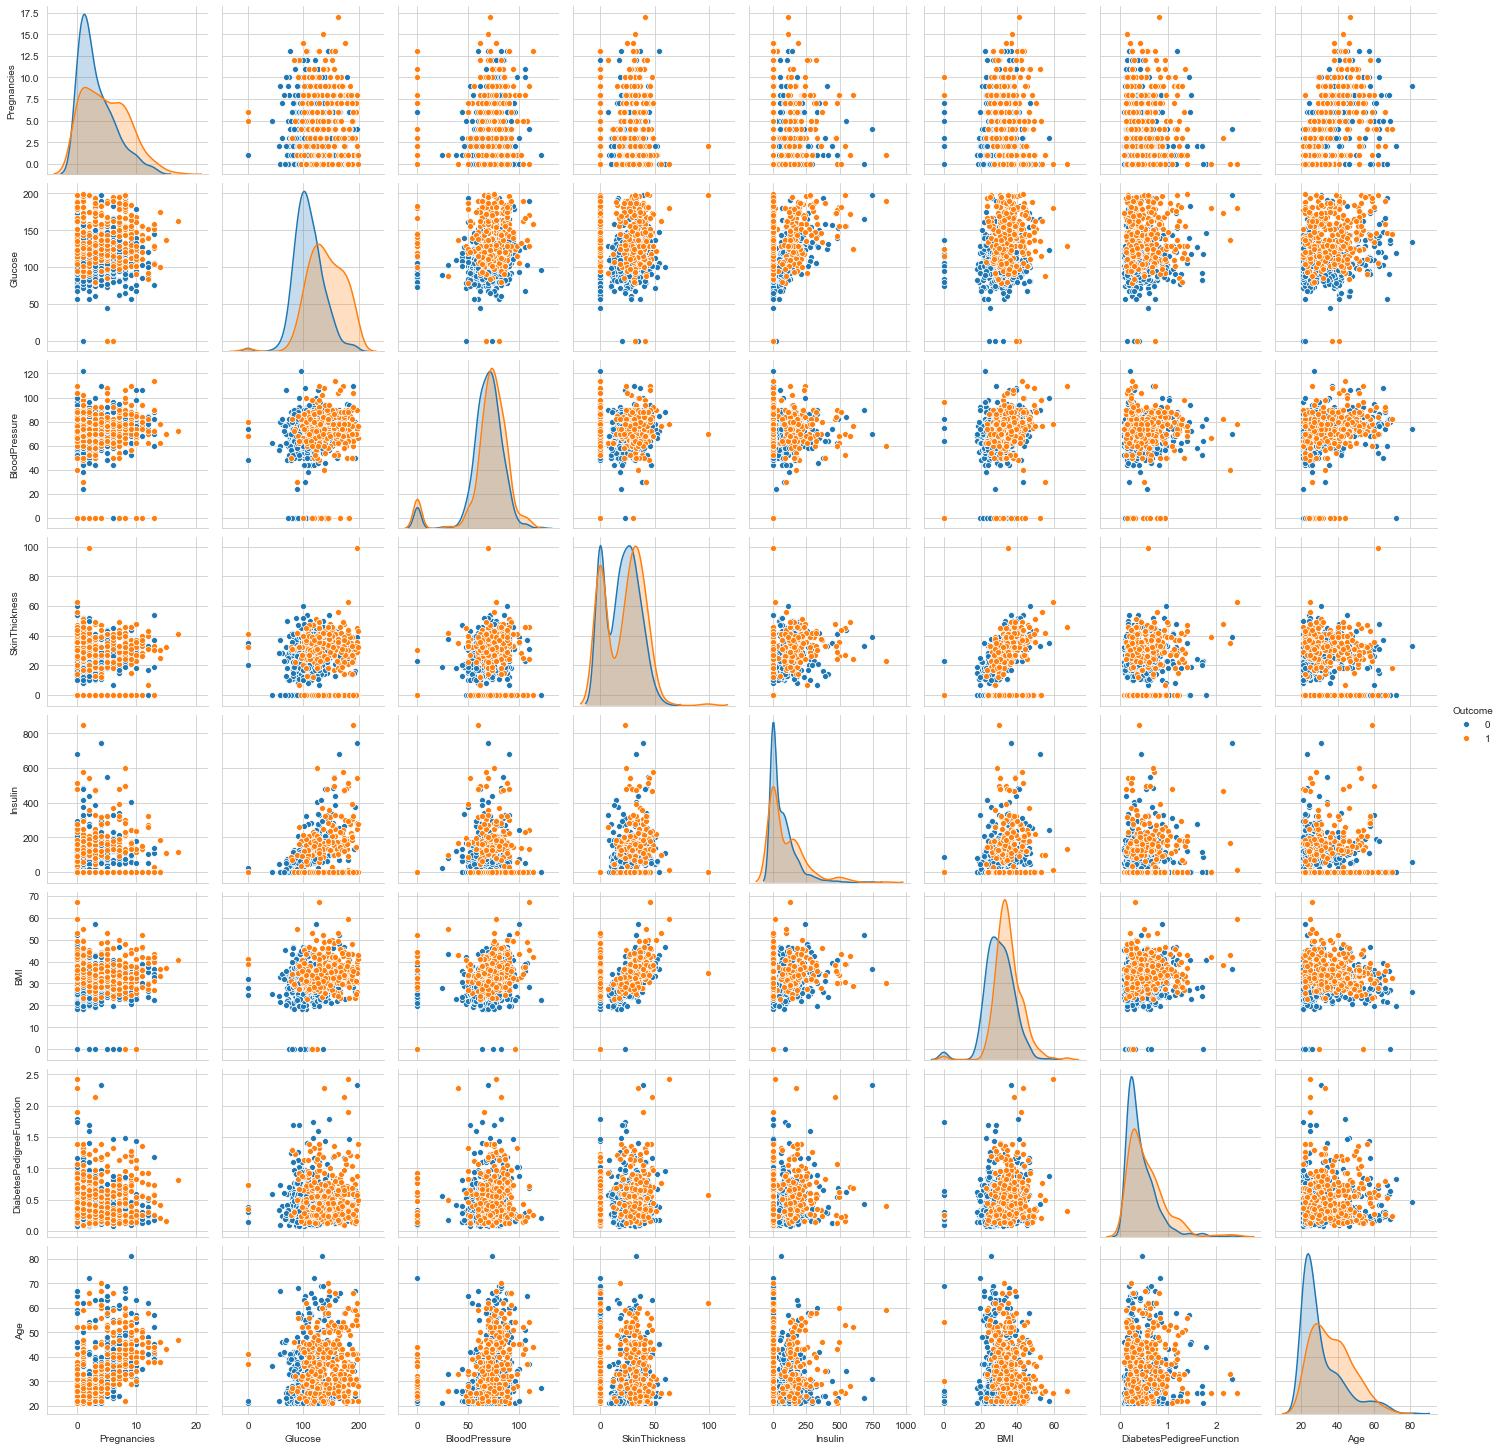

In [21]:
sns.pairplot(db,hue='Outcome')

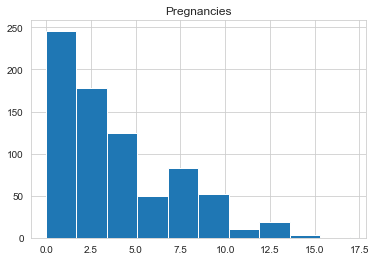

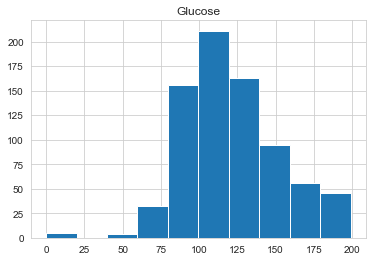

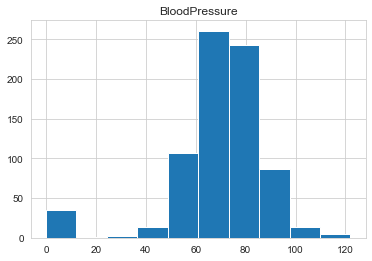

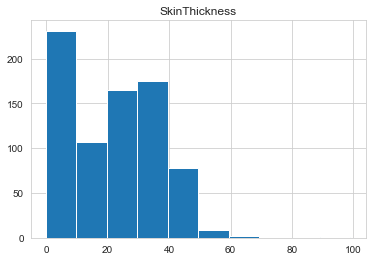

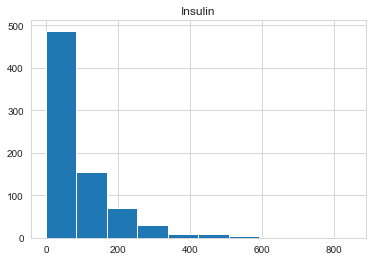

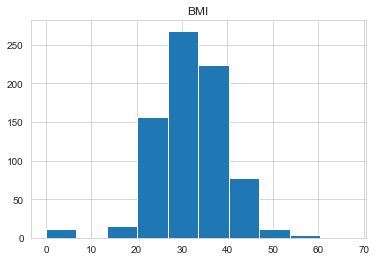

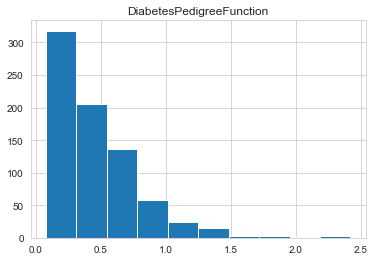

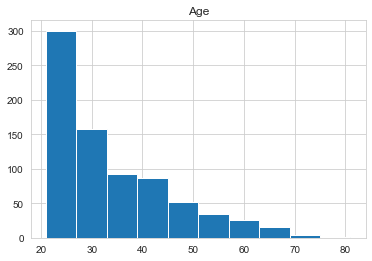

In [22]:
for i in X.columns:
    plt.figsize=(12,10)
    plt.hist(X[i])
    plt.title(i)
    plt.show()

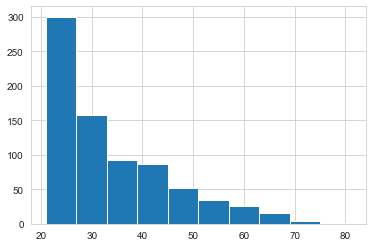

In [23]:
X['Age'].hist()

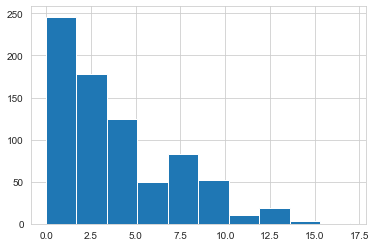

In [24]:
X['Pregnancies'].hist()

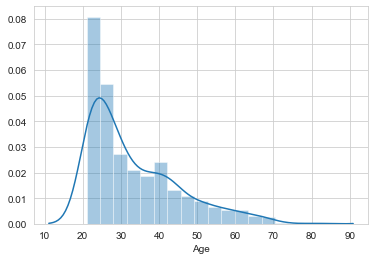

In [25]:
sns.distplot(X['Age'])

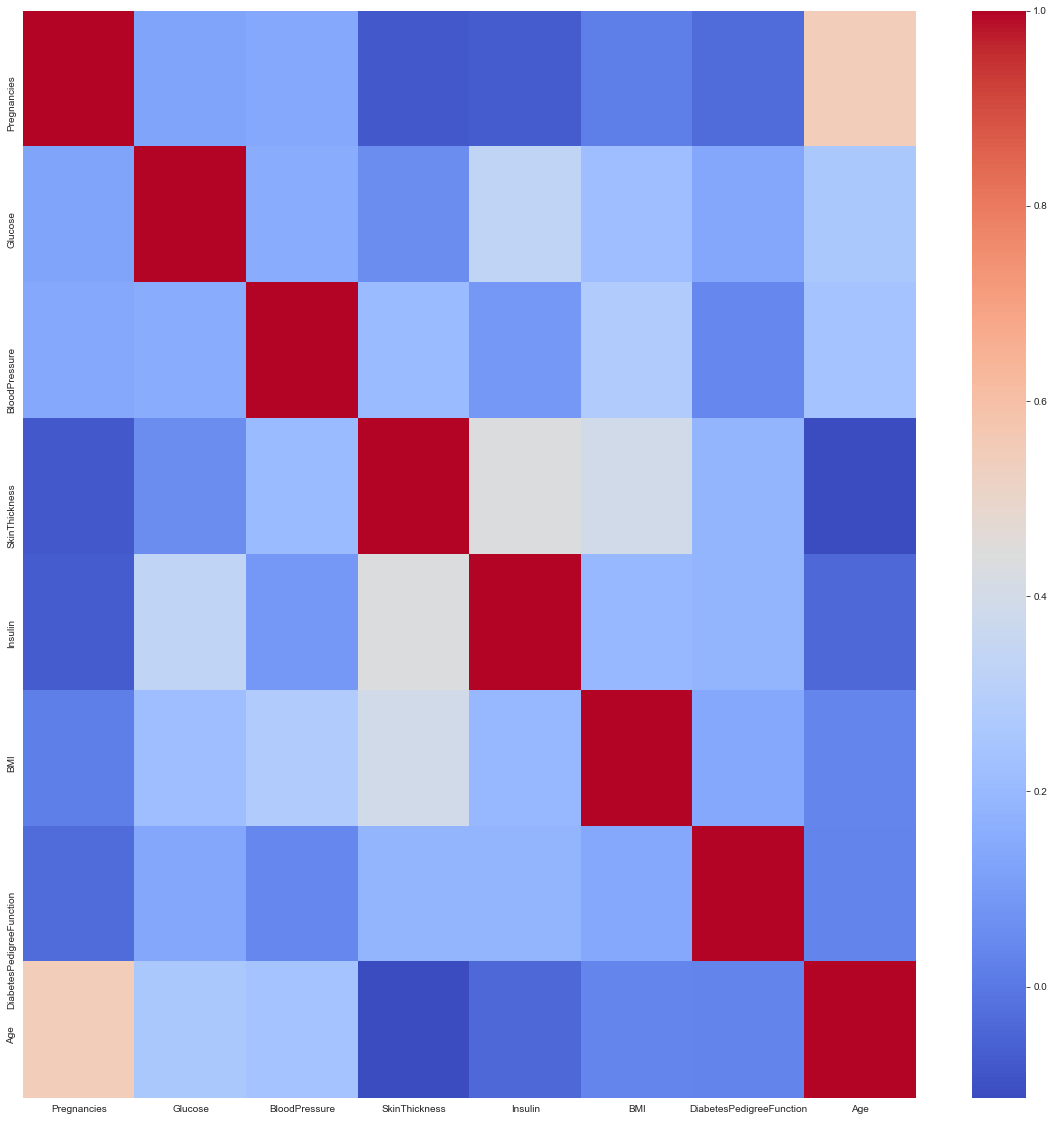

In [26]:
plt.figure(figsize=(20,20))

sns.heatmap(X.iloc[:].corr(), cmap='coolwarm')

<Figure size 1440x1440 with 0 Axes>

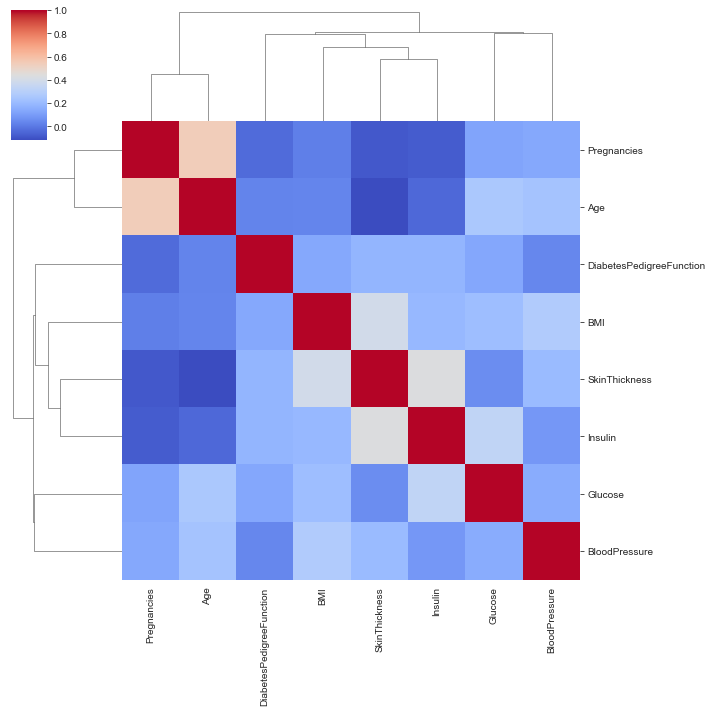

In [27]:
# cluster map

plt.figure(figsize=(20,20))

sns.clustermap(X.iloc[:].corr(), cmap='coolwarm')

Pregnancies                    AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Glucose                     AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
BloodPressure               AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
SkinThickness               AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Insulin                     AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
BMI                         AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
DiabetesPedigreeFunction    AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Age                         AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
dtype: object

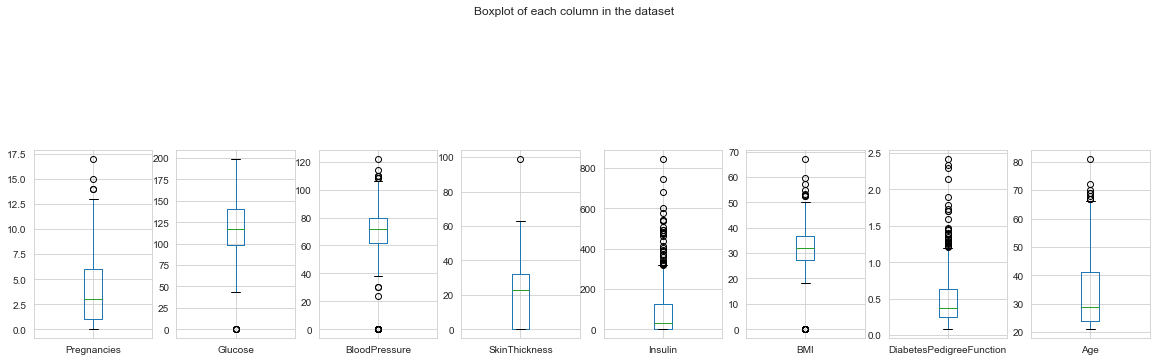

In [28]:
# box plot of the entire dataset to check for outliers

X.iloc[:].plot(kind='box', subplots=True, layout=(5, 8), sharex=False, sharey=False,
          figsize=(20, 20), title='Boxplot of each column in the dataset')

In [29]:
db.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [30]:
# Cluster analysis using T - Distributed Stochastic Neighbor Embeding.drop('target', axis=1)

from sklearn.manifold import TSNE

X = X.iloc[:, :]



cluster = TSNE().fit_transform(X)

Prediction using Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train,y_train)

C:\Users\AYO AJADI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predictions=logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       101
           1       0.81      0.66      0.73        53

    accuracy                           0.83       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



In [39]:
print(confusion_matrix(y_test,predictions))

[[93  8]
 [18 35]]


In [40]:
print(accuracy_score(y_test,predictions))

0.8311688311688312


Prediction using Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC()

In [43]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
predictions= model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(confusion_matrix(y_test,predictions))

[[91 10]
 [22 31]]


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       101
           1       0.76      0.58      0.66        53

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154



Getting the perfect Grid using GridSearch

In [48]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [51]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [52]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [53]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Reruning  the Predictions with the grid

In [54]:
grid_predictions = grid.predict(X_test)

In [55]:
print(confusion_matrix(y_test,grid_predictions))

[[91 10]
 [22 31]]


In [56]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       101
           1       0.76      0.58      0.66        53

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154



Critical Analysis of the Algorithm we adopted:

Yes, wew were able to predict if ahuman being will have diabetes or not.

Our Algorithm was able to get us an accuracy of about 80%.

However,if we had employed cross-validation on our SVM model, we may have gotten a better accuracy.

Furthermore, others who have tried to predict diabetes using this dataset and employed Random Forest Classifier with Cross-Validation achieved an accuracy of 100%.

Other Works on Predicting Diabetes

Many statistical approaches such as Bayesian regularization (BR), Levenberg–Marquardt algorithm (LM) and scaled conjugate gradient (SCG) have been used for the evaluation and accuracy of predicting Diabetes.

Others include; support vector machine, artificial neural network, logistic regression, classification tree, and K-nearest neighbor.

The performance of the system is appraised in terms of accuracy, specificity, sensitivity, precision, negative predictive value, false positive rate, rate of misclassification, measure and receiver operating characteristic (roc) curve.

Research Paper

Diabetes Prediction: A Deep Learning Approach Safial Islam Ayon, Md. Milon Islam Department of Computer Science and Engineering, Khulna University of Engineering & Technology

Prediction of Diabetes Based on Artificial Intelligence Technique Shameem Hasan M.Sc. Engineering Student, Department of Electrical & Electronics Engineering, Islamic University of Technology (An organization of OIC), Gazipur-1704, Bangladesh

Further Research

This could be done by using neural network on this data 

By getting more and varied data.

Recent research on the creation of covid vaccines showed that the pharmaceutical companies tried to determine the effectiveness of the vaccine on a large group of people, such as more than 50,000 people. And people across different segments – Blacks, Whites, Hispanics, Men, Women and others.

Therefore, there is need for more data in order to make the prediction more conclusive. 